In [2]:
import math
import torch
import hess
import hess.utils as utils
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
fpath = "../saved-experiments/"

fname = "train_losses.pt"
losses = torch.load(fpath + fname, map_location="cpu")

fname = "test_losses.pt"
test_losses = torch.load(fpath + fname, map_location="cpu")


fname = "final_eigs.P"
with open(fpath + fname, 'rb') as fp:
    final_eigs = pickle.load(fp)

fname = "init_eigs.P"
with open(fpath + fname, 'rb') as fp:
    init_eigs = pickle.load(fp)


In [5]:
idx = losses[:, 0].argsort()
init_loss = losses[idx, 0]
final_loss = losses[idx, -1]

In [6]:
losses.shape

torch.Size([200, 1000])

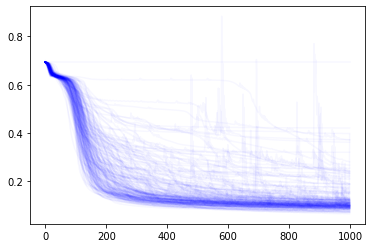

In [7]:
plt.plot(losses.t().detach(), color = 'blue', alpha = 0.03)

In [8]:
n_trial = losses.shape[0]

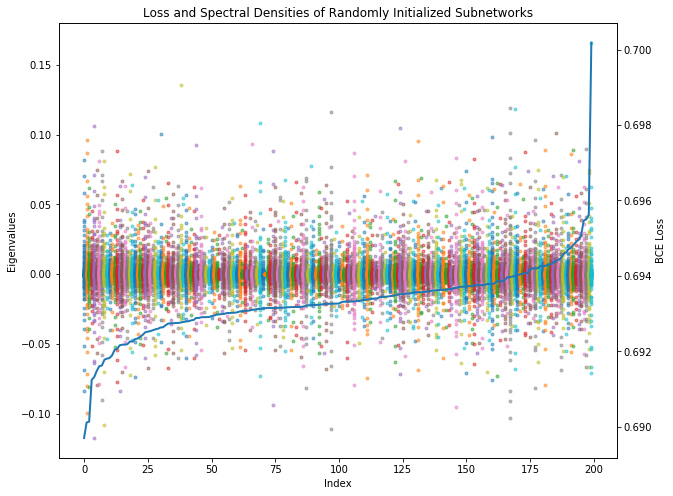

In [9]:
fig, ax1 = plt.subplots(figsize=(10,8))
# ax2 = ax1.twinx()
for ii, tt in enumerate(idx):
    x_plt = np.ones_like(init_eigs[tt]) * ii
    ax1.plot(x_plt, init_eigs[tt],
            marker=".", alpha=0.5, linestyle='None')
ax1.set_ylabel("Eigenvalues")

ax2 = ax1.twinx()
ax2.plot(torch.arange(n_trial), init_loss.detach(),
        linewidth=2.)
ax2.set_ylabel("BCE Loss")
ax1.set_xlabel("Index")
plt.title("Loss and Spectral Densities of Randomly Initialized Subnetworks");

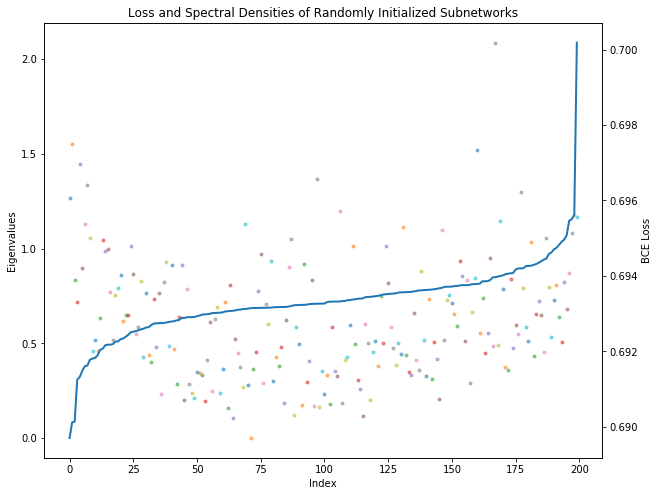

In [31]:
fig, ax1 = plt.subplots(figsize=(10,8))
# ax2 = ax1.twinx()
for ii, tt in enumerate(idx):
    ax1.plot(ii, np.sum(np.abs(init_eigs[tt])),
            marker=".", alpha=0.5, linestyle='None')
ax1.set_ylabel("Eigenvalues")

ax2 = ax1.twinx()
ax2.plot(torch.arange(n_trial), init_loss.detach(),
        linewidth=2.)
ax2.set_ylabel("BCE Loss")
ax1.set_xlabel("Index")
plt.title("Loss and Spectral Densities of Randomly Initialized Subnetworks");

## Let's compute Effective Dimension of Initial Networks ##

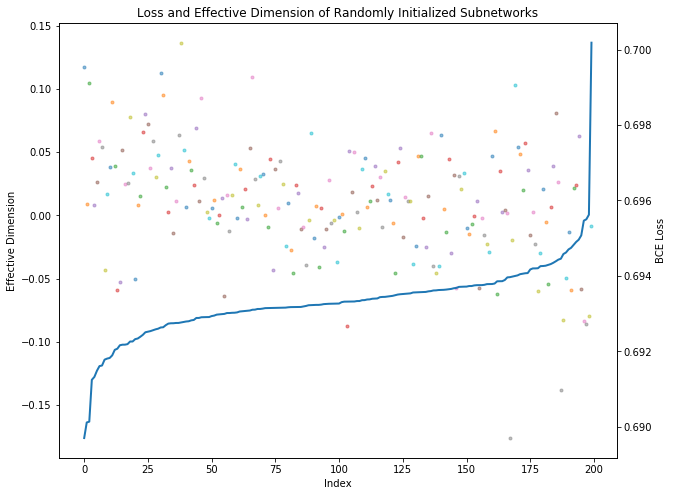

In [34]:
alpha = 0.7
fig, ax1 = plt.subplots(figsize=(10,8))
# ax2 = ax1.twinx()
for ii, tt in enumerate(idx):
    eff_dim = init_eigs[tt]/(init_eigs[tt] + alpha)
    ax1.plot(ii, np.sum(eff_dim),
            marker=".", alpha=0.5, linestyle='None')
ax1.set_ylabel("Effective Dimension")

ax2 = ax1.twinx()
ax2.plot(torch.arange(n_trial), init_loss.detach(),
        linewidth=2.)
ax2.set_ylabel("BCE Loss")
ax1.set_xlabel("Index")
plt.title("Loss and Effective Dimension of Randomly Initialized Subnetworks");

In [43]:
# fig, ax1 = plt.subplots(figsize=(10,8))
# ax2 = ax1.twinx()
init_eff_dim = np.zeros(200)
final_eff_dim = np.zeros(200)
for ii, tt in enumerate(idx):
    init_eff_dim = init_eigs[tt]/(init_eigs[tt] + alpha)
    final_eff_dim = final_eigs[tt]/(final_eigs[tt] + alpha)

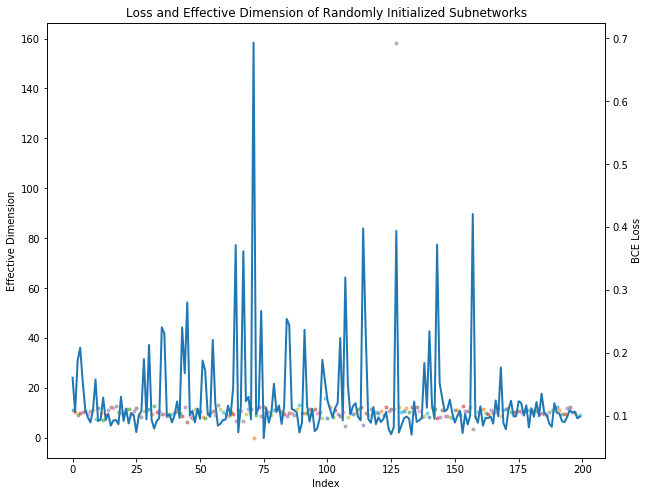

In [36]:
alpha = 8
fig, ax1 = plt.subplots(figsize=(10,8))
# ax2 = ax1.twinx()
for ii, tt in enumerate(idx):
    eff_dim = final_eigs[tt]/(final_eigs[tt] + alpha)
    ax1.plot(ii, np.sum(eff_dim),
            marker=".", alpha=0.5, linestyle='None')
ax1.set_ylabel("Effective Dimension")

ax2 = ax1.twinx()
ax2.plot(torch.arange(n_trial), final_loss.detach(),
        linewidth=2.)
ax2.set_ylabel("BCE Loss")
ax1.set_xlabel("Index")
plt.title("Loss and Effective Dimension of Randomly Initialized Subnetworks");

#### This is hopeful, let's compute and sort by this

In [37]:
alpha = 8.
eff_dim = torch.zeros(len(final_eigs))
for ii, tt in enumerate(idx):
    temp = init_eigs[tt]/(init_eigs[tt] + alpha)
    eff_dim[ii] = torch.tensor(np.sum(temp))
    

Text(0, 0.5, 'Initial Effective Dimensionality')

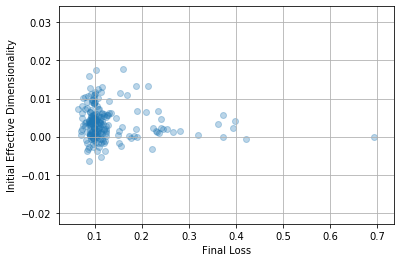

In [38]:
plt.scatter(final_loss.detach(), eff_dim, alpha = 0.3)
plt.grid()
plt.xlabel('Final Loss')
plt.ylabel('Initial Effective Dimensionality')

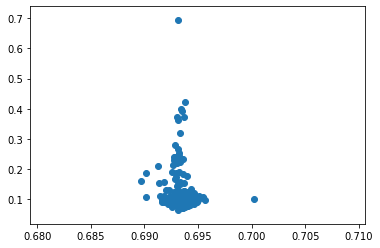

In [39]:
plt.scatter(init_loss.detach(), final_loss.detach())

Text(0, 0.5, 'Final Effective Dimension')

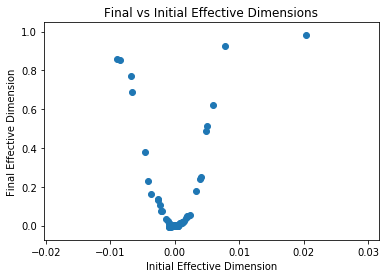

In [46]:
plt.scatter(init_eff_dim, final_eff_dim)
plt.title("Final vs Initial Effective Dimensions")
plt.xlabel("Initial Effective Dimension")
plt.ylabel("Final Effective Dimension")

## Effective Dimension And Test Losses